# Intrinsic Dimension Demo Figure
This notebook generates Figure 2, used in the intro to provide an intuition on what the different forms of intrinsic dimension represent.

In this work we rely on the scikit-dimension (https://scikit-dimension.readthedocs.io/en/latest/index.html) library for estimating both local and global ID. We will use plotly for generation of 3D scatter plots

In [1]:
import skdim
import pandas as pd
import plotly.express as px

In [2]:
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex

scikit-dimension provides different methods for ID estimation. For figure 2, we will use local PCA, one of the most commonly used methods. The next line creates an estimation object that we will use through the notebook.

In [3]:
pca=skdim.id.lPCA()

The following line creates a camera object with information of where to situate the camera when plotting 3D scatter plots. In other words, this allows us to automatically set the orientation of the axes in 3D plots

In [4]:
camera = dict( up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=1, y=2, z=2) )

The followning cell creates a color scale that will use across all images in this notebook

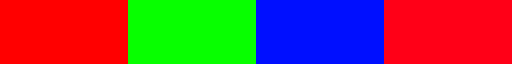

In [5]:
hsv4_cs  = get_cmap('hsv',4)
hsv4_map = {str(i):rgb2hex(hsv4_cs(i)) for i in range(4)}
hsv4_cs

## Datasets with varying local and global ID (Panel A in Figure 2)

The first panel will show a dataset with points sitting on a 3D sphere. Such an object is expected to have a global ID = 3, yet locally it should have 2, as all datapoints lie on the surface of the sphere

In [6]:
data1 = pd.DataFrame(skdim.datasets.hyperSphere(n=5000, random_state = 0, d=3), columns=['x','y','z'])
data1.loc[:,'lid'] = pca.fit_pw(data1,n_neighbors=25).dimension_pw_
data1['lid'] = data1['lid'].astype(str)
data1['size'] = 1
trace1 = px.scatter_3d(data1,x='x',y='y',z='z', width=400, height=400, color='lid', size='size', size_max=5, color_discrete_map=hsv4_map)
trace1.update_layout(margin=dict(l=0, r=0, b=0, t=0))
trace1.update_traces(marker=dict(line=dict(width=0)))
print('++ INFO: Global ID = %f' % pca.fit(data1).dimension_)
trace1

++ INFO: Global ID = 3.000000


The second panel will show a dataset with points forming a 3D ball. Such an object is expected to have both a global and local ID = 3.

In [7]:
data1 = pd.DataFrame(skdim.datasets.hyperBall(n=5000, random_state = 0, d=3), columns=['x','y','z'])
data1.loc[:,'lid'] = pca.fit_pw(data1,n_neighbors=25).dimension_pw_
data1['lid'] = data1['lid'].astype(str)
data1['size'] = 1
trace1 = px.scatter_3d(data1,x='x',y='y',z='z', width=400, height=400, color='lid', size='size', size_max=5, color_discrete_map=hsv4_map)
trace1.update_layout(margin=dict(l=0, r=0, b=0, t=0))
trace1.update_traces(marker=dict(line=dict(width=0)))
print('++ INFO: Global ID = %f' % pca.fit(data1).dimension_)
trace1

++ INFO: Global ID = 3.000000


Finally, panel (C) shows an example of a dataset sitting in a 3D space (global ID = 3), yet with 3 different distinct sections, a line (local ID = 1), an eliptical plane (local ID = 2) and an eliptical ball (local ID = 3).

In [8]:
data1, clusters = skdim.datasets.lineDiskBall(n=5000, random_state = 0)
data1 = pd.DataFrame(data1, columns=['x','y','z'])
data1.loc[:,'lid'] = pca.fit_pw(data1,n_neighbors=25).dimension_pw_
data1['lid'] = data1['lid'].astype(str)
data1['size'] = 1
trace1 = px.scatter_3d(data1,x='x',y='y',z='z', width=400, height=400, color='lid', size='size', size_max=5, color_discrete_map=hsv4_map)
trace1.update_layout(margin=dict(l=0, r=0, b=0, t=0))
trace1.update_traces(marker=dict(line=dict(width=0)))
print('++ INFO: Global ID = %f' % pca.fit(data1).dimension_)
trace1

++ INFO: Global ID = 3.000000


## Twin Peaks example

We will use this other dataset to explore how IDlocal depends on how well the manifold is sampled and also on the size of the neighborhood used for estimation.

First we create three equivalent datasets with different number of samples

In [9]:
data1 = pd.DataFrame(skdim.datasets.hyperTwinPeaks(n=2000, random_state = 0), columns=['x','y','z'])
data2 = pd.DataFrame(skdim.datasets.hyperTwinPeaks(n=5000, random_state = 0), columns=['x','y','z'])
data3 = pd.DataFrame(skdim.datasets.hyperTwinPeaks(n=10000, random_state = 0), columns=['x','y','z'])

Next, we estimate the local ID for the three datasets using three different neighborhood sizes, namely 25, 50 and 100.

In [11]:
%%time
#local ID (pointwise estimates)
for data in [data1,data2,data3]:
    data['size'] = 1
    for knn in [25,50,100]:
        lid = pca.fit_pw(data,n_neighbors=knn).dimension_pw_
        data.loc[:,'lid_{}'.format(str(knn))] = lid
        data['lid_{}'.format(str(knn))] = data['lid_{}'.format(str(knn))].astype(str)

CPU times: user 16.2 s, sys: 244 ms, total: 16.5 s
Wall time: 16.5 s


### Results for lowest density and knn=25

In [12]:
trace1 = px.scatter_3d(data1,x='x',y='y',z='z', width=400, height=400, color='lid_25', size='size', size_max=5, color_discrete_map=hsv4_map)
trace1.update_layout(margin=dict(l=0, r=0, b=0, t=0))
trace1.update_traces(marker=dict(line=dict(width=0)))
trace1.update_layout(scene_camera=camera)

### Results for middle density and knn=25

In [14]:
trace2 = px.scatter_3d(data2,x='x',y='y',z='z', width=400, height=400, color='lid_25',  size='size', size_max=5,color_discrete_map=hsv4_map)
trace2.update_layout(scene_camera=camera)
trace2.update_layout(margin=dict(l=0, r=0, b=0, t=0))
trace2.update_traces(marker=dict(line=dict(width=0)))

### Results for higher density and knn=25

In [16]:
trace3 = px.scatter_3d(data3,x='x',y='y',z='z', width=400, height=400, color='lid_25', size='size', size_max=5,color_discrete_map=hsv4_map)
trace3.update_layout(margin=dict(l=0, r=0, b=0, t=0))
trace3.update_traces(marker=dict(line=dict(width=0)))
trace3.update_layout(scene_camera=camera)

### Results for lower density and knn=50

In [17]:
trace1 = px.scatter_3d(data1,x='x',y='y',z='z', width=400, height=400, color='lid_50', size='size', size_max=5,color_discrete_map=hsv4_map)
trace1.update_layout(margin=dict(l=0, r=0, b=0, t=0))
trace1.update_traces(marker=dict(line=dict(width=0)))
trace1.update_layout(scene_camera=camera)

### Results for lower density and knn=100

In [18]:
trace1 = px.scatter_3d(data1,x='x',y='y',z='z', width=400, height=400, color='lid_100', size='size', size_max=5,color_discrete_map=hsv4_map)
trace1.update_layout(scene_camera=camera)
trace1.update_layout(margin=dict(l=0, r=0, b=0, t=0))
trace1.update_traces(marker=dict(line=dict(width=0)))